<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
**Задача:** спрогнозировать, уйдёт клиент из банка в ближайшее время или нет, используя исторические данные о поведении клиентов и расторжении договоров с банком. 

Построить модель с предельно большим значением *F1*-меры. Проверить *F1*-меру на тестовой выборке.

Дополнительно измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    1563

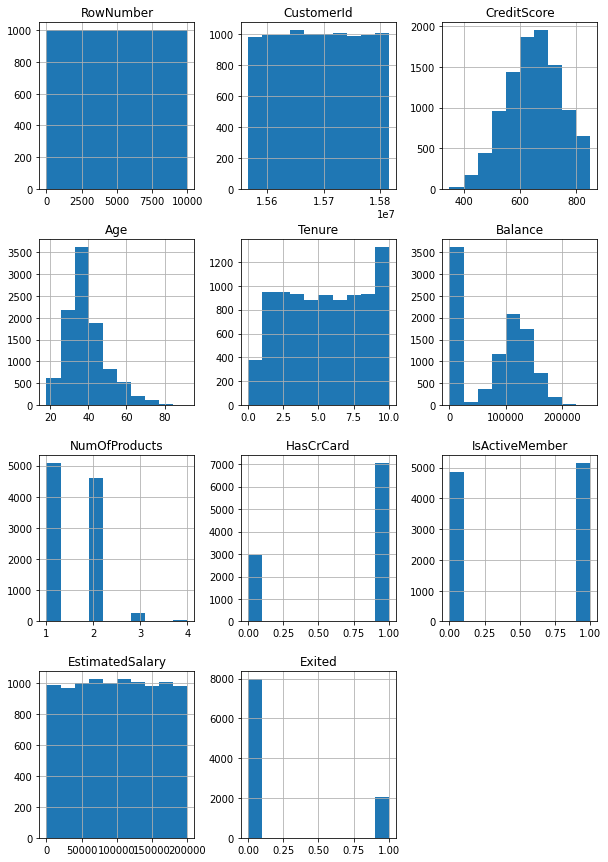

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()
print(df.head())
df.hist(figsize=(10, 15))
plt.show()

### Обработка данных

Изменим названия столбцов.

In [3]:
df.columns = df.columns.str.lower()
df = df.rename(columns={
    'rownumber': 'row_number',
    'customerid': 'customer_id',
    'creditscore':'credit_score',
    'numofproducts':'num_of_products',
    'hascrcard':'has_cr_card',
    'isactivemember':'is_active_member',
    'estimatedsalary':'estimated_salary'}) 
print(df.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


Проверим на наличие дубликатов и попусков.

In [4]:
print(df.duplicated().sum())
print(df.isna().sum())

0
row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


В данных нет явных дубликатов, пропуски только в столбце "Tenure". Пропусков слишком много, поэтому удалять их нельзя. Заменим проуски на медианное значение.

In [5]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
print(df.isna().sum())

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


В ходе ообработки данных:
- Изменены названия столбцов
- Данные проврены на наличие дубликатов и пропусков
- В столбце "tenure" устранены пропуски 

### Подготовка данных

Целевой ризнак - столбец exited - факт ухода клиента.

Воспользуемся техникой Ordinal Encoding и разделим данные на обучающую, валидационную и тестовую выборки.

In [6]:
df = df.drop(['surname'], axis=1) #Удалим слолбец с фамилиями, тк они не влияют на возможный уход клиента из банка
features = df.drop(['exited'], axis=1)
target = df['exited']


# Разделим датафрейм на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
features, features_test, target, target_test = train_test_split(
    features, target, test_size=.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.25, random_state=12345)

features_train = pd.get_dummies(features_train, drop_first = True)
features_valid = pd.get_dummies(features_valid, drop_first = True)
features_test = pd.get_dummies(features_test, drop_first = True)
                         

#Стандартизируем данные
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print('features_train', features_train.shape,
     '\nfeatures_valid', features_valid.shape,
     '\ntarget_train', target_train.shape,
     '\ntarget_valid', target_valid.shape,
     '\nfeatures_test', features_test.shape,
     '\ntarget_test',target_test.shape)

pd.options.mode.chained_assignment = None

features_train (6000, 13) 
features_valid (2000, 13) 
target_train (6000,) 
target_valid (2000,) 
features_test (2000, 13) 
target_test (2000,)


## Исследование задачи

Рассмотрим модель без учета дисбаланса.

Для обучения будем использовать модель случайного леса, тк она оказалась наиболее точной в пердыдущем проекте.

In [7]:
forest_best_model = None
best_f1 = 0
best_est = 0
best_depth = 0

for depth in range (1, 15): 
    for est in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid) 
        if f1 > best_f1:
            forest_best_model = model
            best_f1 = f1
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_f1)
print('Параметры наилучшей модели')
print('n_estimators -', best_est)
print('max_depth -', best_depth)


F1 наилучшей модели на валидационной выборке: 0.5474683544303798
Параметры наилучшей модели
n_estimators - 10
max_depth - 13


0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

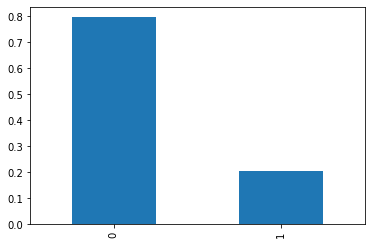

In [8]:
class_frequency = df['exited'].value_counts(normalize=1)# < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar')

Проверим модель на адекватность. Сравнивать будем с наиболее подходящей - константной моделью, тк в нашем случае наблюдается сильный дисбаланс классов.

In [9]:
target_pred_constant = pd.Series([0]*len(target))
print(accuracy_score(target, target_pred_constant))

0.79875


Метрика точнсти выдала неплохое совпадение с "наивным" алгоритмом. Мы не можем говорить об адекватности такой модели - нужно сбалансировать классы. Метрика accuracy не подходит.

## Борьба с дисбалансом

Существует нескольлько способов борьбы с дисбалансом, проверим их и выберем наилучший


Исследуем модель случайного леса и логистическую регрессию.

### Взвешивание классов

In [10]:
# Модель случайного леса
forest_best_model_weight = None
best_f1_weight = 0
best_est = 0
best_depth = 0

for depth in range (5, 10): 
    for est in range (20, 40):
        model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1_weight = f1_score(target_valid, predicted_valid) 
        if f1_weight > best_f1_weight:
            forest_best_model_weight = model
            best_f1_weight = f1_weight
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_f1_weight)
print('Параметры наилучшей модели')
print('n_estimators -', best_est)
print('max_depth -', best_depth)



F1 наилучшей модели на валидационной выборке: 0.5882352941176471
Параметры наилучшей модели
n_estimators - 39
max_depth - 9


In [11]:
# Логистическая регрессия
log_model_weight = LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced', max_iter=1000)
log_model_weight.fit(features_train, target_train) 
predicted_valid = log_model_weight.predict(features_valid)
f1_weight = f1_score(target_valid, predicted_valid) 

print("F1 Логистической регрессии:", f1_weight)


F1 Логистической регрессии: 0.28966521106259097


### Увеличение выборки

In [12]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)


In [13]:
# Модель случайного леса
forest_best_model_upsample = None
best_f1_upsample = 0
best_est = 0
best_depth = 0

for depth in range (5, 10): 
    for est in range (20, 40):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        f1_upsample = f1_score(target_valid, predicted_valid) 
        if f1_upsample > best_f1_upsample:
            forest_best_model_upsample = model
            best_f1_upsample = f1_upsample
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_f1_upsample)
print('Параметры наилучшей модели')
print('n_estimators -', best_est)
print('max_depth -', best_depth)

F1 наилучшей модели на валидационной выборке: 0.6019900497512437
Параметры наилучшей модели
n_estimators - 31
max_depth - 7


In [14]:
# Логистическая регрессия
loc_model_up = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
loc_model_up.fit(features_upsampled, target_upsampled)
predicted_valid = loc_model_up.predict(features_valid)
f1_upsample = f1_score(target_valid, predicted_valid) 

print("F1 Логистической регрессии:", f1_upsample)


F1 Логистической регрессии: 0.0


### Уменьшение выборки

In [15]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

In [16]:
# Модель случайного леса
forest_best_model_downsample = None
best_f1_downsample = 0
best_est = 0
best_depth = 0

for depth in range (5, 10): 
    for est in range (20, 40):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled) 
        predicted_valid = model.predict(features_valid)
        f1_downsample = f1_score(target_valid, predicted_valid) 
        if f1_downsample > best_f1_downsample:
            forest_best_model_downsample = model
            best_f1_downsample = f1_downsample
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_f1_downsample)
print('Параметры наилучшей модели')
print('n_estimators -', best_est)
print('max_depth -', best_depth)

F1 наилучшей модели на валидационной выборке: 0.5943661971830986
Параметры наилучшей модели
n_estimators - 21
max_depth - 9


In [17]:
# Логистическая регрессия
loc_model_dw = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
loc_model_dw.fit(features_downsampled, target_downsampled) 
predicted_valid = loc_model_dw.predict(features_valid)
f1_downsample = f1_score(target_valid, predicted_valid) 

print("F1 Логистической регрессии:", f1_downsample)


F1 Логистической регрессии: 0.0


Метрика F1 для модели случайного леса, полученая при сравнении методов борьбы с дисбалансом:
- Взвешивание классов - 0.588
- Увеличение выборки - 0.602
- Уменьшение выборки - 0.594

Наилучшим методом оказалось увеличение выборки.

Метрика F1 для логистической регрессии, полученая при сравнении методов борьбы с дисбалансом:
- Взвешивание классов - 0.290
- Увеличение выборки - 0
- Уменьшение выборки - 0

Увеличение и уменьшение выборки для логистической регрессии не дало реультатов. Помогло лишь взвешивание классов, однако по сравнению cо значениями F1, полученными для случайного леса, модель логистической регрессии для решения даной задачи не подходит.

## Тестирование модели

Тестирование было проведено выше при сравнении методов борьбы с дисбалансом. Исследуем метрику AUC-ROC для каждого из рассмотренных методов.

### Взвешивание классов

Случайный лес: 0.8429613475352039
Логистическая регрессия: 0.5095872164089783


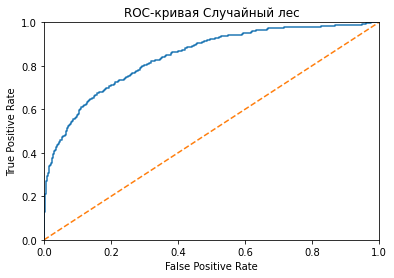

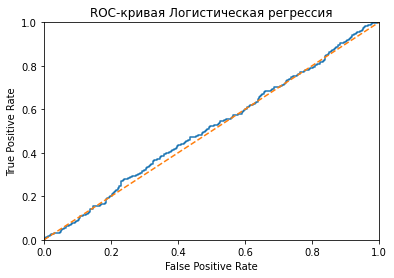

In [18]:
# Случайный лес
probabilities_valid = forest_best_model_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

def plot_roc (fpr, tpr, title):
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.plot([0, 1], [0, 1], linestyle='--')
    
print('Случайный лес:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Случайный лес')

#Логистическая регрессия
probabilities_valid = log_model_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Логистическая регрессия:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Логистическая регрессия')


### Увеличение выборки

Случайный лес: 0.8476377283153106
Логистическая регрессия: 0.5244635752536484


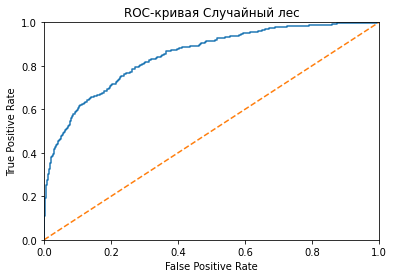

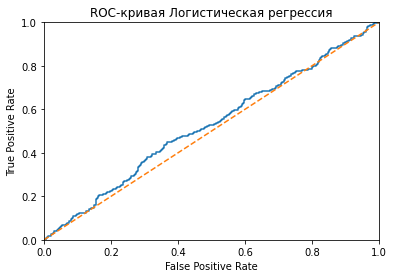

In [19]:
# Случайный лес
probabilities_valid = forest_best_model_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Случайный лес:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Случайный лес')

#Логистическая регрессия
probabilities_valid = loc_model_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Логистическая регрессия:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Логистическая регрессия')

### Уменьшение выборки

Случайный лес: 0.8330506629111504
Логистическая регрессия: 0.5244635752536484


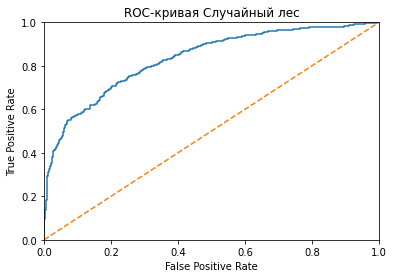

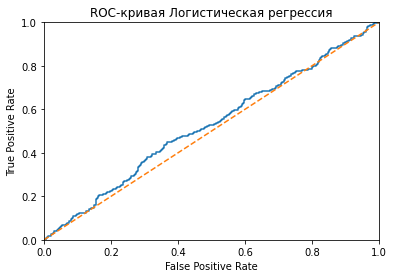

In [20]:
# Случайный лес
probabilities_valid = forest_best_model_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Случайный лес:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Случайный лес')

#Логистическая регрессия
probabilities_valid = loc_model_dw.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Логистическая регрессия:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Логистическая регрессия')

### Промежуточные выводы

Рассчет AUC-ROC для случайного леса показал следующие значения:
- Взвешивание классов - 0.843
- Увеличение выборки - 0.848
- Уменьшение выборки - 0.833

Для случая увеличения выборки, метрика AUC-ROC наибольшая, а ROC-кривая наиболее высокая из представленных, что еще раз подтверждает правильность выбора метода. 

Для логистической регрессии значения AUC-ROC:
- Взвешивание классов - 0.510
- Увеличение выборки - 0.524
- Уменьшение выборки - 0.524

ROC-кривая практически совпадает со случайной моделью, значения AUC-ROC для логистической регрессии значительно хуже, чем для модели случайного леса, что еще раз показывает, что модель логистической регрессии не подходит для решения данной задачи.


Наилучшей моделью оказалась моледь случайного леса с увеличенной выборкой. Проверим ее на тестовой выборке.

### Проверка лучшей модели на тестовой выборке

Случайный лес: 0.8632842567268797


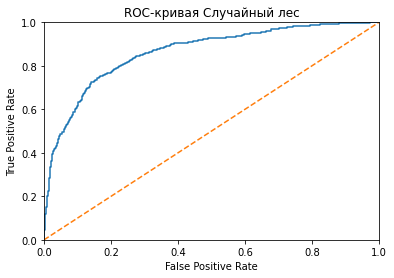

In [21]:
# Случайный лес
probabilities_test = forest_best_model_upsample.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('Случайный лес:', auc_roc)
plot_roc(fpr, tpr, 'ROC-кривая Случайный лес')


Рассчет AUC-ROC для случайного леса с увеличенной выборкой на тестовой выборке:
 - 0.863


## Вывод

В ходе работы над проектом была проведена предобработка данных:
- Изменены названия столбцов
- Данные проврены на наличие дубликатов и пропусков
- В столбце "tenure" устранены пропуски 
- Преобразованы категориальные признаки
- Данные стандартизированы

Была обучена модель "Случайный лес" с подбором наиболее подходящих параметров без учета дисбаланса, однако такая модель не прошла проверку на адекватность, при сравнении ее с "наивной" моделью, предсказывающей отрицательный класс.

Исследованы 3 метода борьбы с дисбалансом для моделей "Случайный лес" и "Логистическая регрессия", для них получены значения среднего гармонического полноты и точности (метрика F1).

Для модели "Случайный лес":
- Взвешивание классов - 0.588
- Увеличение выборки - 0.602
- Уменьшение выборки - 0.594


Для модели "Логистическая регрессия":
- Взвешивание классов - 0.290
- Увеличение выборки - 0
- Уменьшение выборки - 0

Увеличение и уменьшение выборки для логистической регрессии не дало реультатов. Помогло лишь взвешивание классов, однако по сравнению cо значениями F1, полученными для случайного леса, модель логистической регрессии для решения даной задачи не подходит.

Построена кривая ошибок и получено значение площади под ней (метрика AUC-ROC):
Для модели "Случайный лес":
- Взвешивание классов - 0.843
- Увеличение выборки - 0.848
- Уменьшение выборки - 0.833

Для модели "Логистическая регрессия":
- Взвешивание классов - 0.510
- Увеличение выборки - 0.524
- Уменьшение выборки - 0.524

ROC-кривая практически совпадает со случайной моделью, значения AUC-ROC для логистической регрессии значительно хуже, чем для модели случайного леса, что еще раз показывает, что модель логистической регрессии не подходит для решения данной задачи.


Рассчет AUC-ROC для случайного леса с увеличенной выборкой на тестовой выборке:
 - 0.863


Таким образом, наилучшим методом борьбы с дисбалансом оказался метод увеличения выборки, а наилучшей моделью - модель "Случайный лес".